In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn import svm, neighbors, metrics
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [17]:
ClassA_csv="/content/classA2.csv"
ClassB_csv="/content/classB2.csv"

LOAD THE FILES AND PRINT DIMENSIONS

In [18]:
signalsA= np.loadtxt(ClassA_csv, delimiter=";", skiprows=0)
print("Signal dataset A shape: "+ str(signalsA.shape))
signalsB= np.loadtxt(ClassB_csv, delimiter=";", skiprows=0)
print("Signal dataset B shape: "+ str(signalsB.shape))

Signal dataset A shape: (1953, 293)
Signal dataset B shape: (1953, 293)


PLOT SOME SIGNAL FROM EACH CLASS

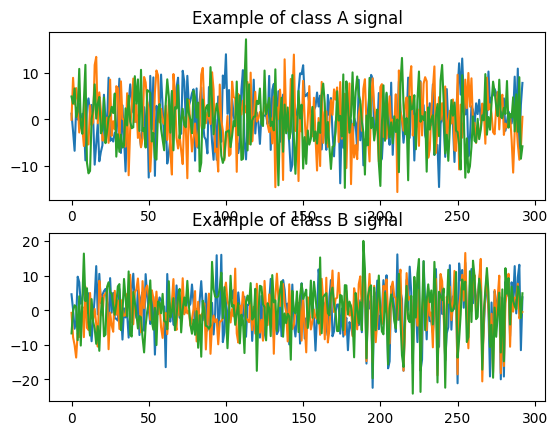

In [19]:
plt.subplot(2,1,1)
plt.plot(signalsA[0])
plt.plot(signalsA[1])
plt.plot(signalsA[2])
plt.title("Example of class A signal")
plt.subplot(2,1,2)
plt.plot(signalsB[0])
plt.plot(signalsB[1])
plt.plot(signalsB[2])
plt.title("Example of class B signal")
plt.show()

EXTRACT FEATURES FROM THE SIGNALS A

In [20]:
datasetA=[]
for signal in signalsA:
    mean=np.mean(signal)
    max=np.max(signal)
    min=np.min(signal)
    rms = np.sqrt(np.mean(signal**2))
    std=np.std(signal)
    skw=sc.skew(signal)
    kur=sc.kurtosis(signal)                       #  <-- compute features
    features_SignalA=[mean,max,kur,min,rms,std,skw, 0]
    datasetA.append(features_SignalA)

EXTRACT FEATURES FROM THE SIGNALS B

In [21]:
datasetB=[]
for signal in signalsB:
    mean=np.mean(signal)
    max=np.max(signal)
    min=np.min(signal)
    rms = np.sqrt(np.mean(signal**2))
    std=np.std(signal)
    skw=sc.skew(signal)
    kur=sc.kurtosis(signal)                     #  <-- compute features
    features_SignalB=[mean,max,kur,min,rms,std,skw, 1]
    datasetB.append(features_SignalB)

MANAGE DATASET

In [22]:
datasetA=np.array(datasetA)
datasetB=np.array(datasetB)
np.random.shuffle(datasetA)
np.random.shuffle(datasetB)
print("dataset A shape: "+ str(datasetA.shape))
print("dataset B shape: "+ str(datasetB.shape))

dataset=np.concatenate((datasetA,datasetB))
np.random.shuffle(dataset)
print("TOTAL dataset shape: "+ str(dataset.shape))

X = dataset[:,:-1]                          #  <-- Extract variable
Y = dataset[:,-1]                          #  <-- Extract class

dataset A shape: (1953, 8)
dataset B shape: (1953, 8)
TOTAL dataset shape: (3906, 8)


NORMALIZE

In [23]:
mean = X.mean(axis=0)
X=X-mean
std = X.std(axis=0)
X=X/std

print("Variables dataset shape: "+ str(X.shape))

Variables dataset shape: (3906, 7)


divide the dataset into a training and validation subset

In [24]:
Xtrain=X[0:2000]
Ytrain=Y[0:2000]
Xval=X[2000:]
Yval=Y[2000:]

USE A SVM ALGORITHM TO CLASSIFY SIGNALS

In [25]:
#Create a svm Classifier
SVM_Classifier = svm.SVC(kernel='rbf')                                # <--   classifier
#Train the model using the training sets
SVM_Classifier.fit(Xtrain, Ytrain)                                                  # <--   fit classifier
#Validate the system with the validation dataset
y_pred = SVM_Classifier.predict(Xval)                                         # <--   predict new samples
#print metrics to evaluate performance
print("SVM Accuracy:", metrics.accuracy_score(Yval, y_pred))
print("SVM Recall:", metrics.recall_score(Yval, y_pred))
print("SVM Precision:", metrics.precision_score(Yval, y_pred))
#print(y_pred)
#print(Yval)

SVM Accuracy: 0.9958027282266527
SVM Recall: 0.9947589098532494
SVM Precision: 0.9968487394957983


SAME THING, BUT USING KNN ALGORITHM

In [26]:
KNN_Classifier = neighbors.KNeighborsClassifier(5, weights="uniform")
KNN_Classifier.fit(Xtrain, Ytrain)
y_pred = KNN_Classifier.predict(Xval)
print("KNN Accuracy:", metrics.accuracy_score(Yval, y_pred))
print("KNN Recall:", metrics.recall_score(Yval,y_pred))
print("KNN Precision:", metrics.precision_score(Yval, y_pred))

KNN Accuracy: 0.9926547743966422
KNN Recall: 0.9926624737945493
KNN Precision: 0.9926624737945493


FIGURES

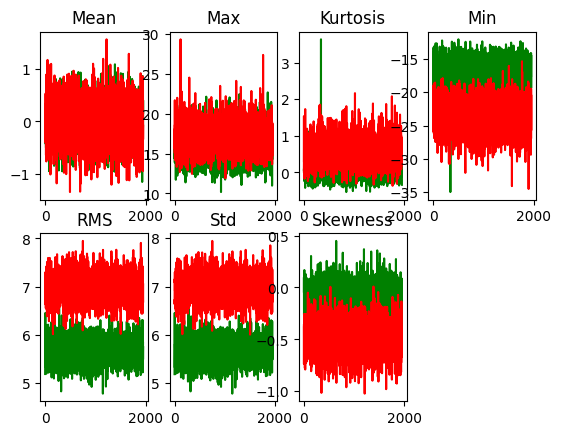

In [27]:
titles=["Mean", "Max", "Kurtosis", "Min", "RMS", "Std", "Skewness"]
f4=plt.figure()
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.plot(datasetA[:,i], c="g")
    plt.plot(datasetB[:,i], c="r")
    plt.title(titles[i])
plt.show()

In [28]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
x1=np.array(principalComponents[:,0])
x2=np.array(principalComponents[:,1])
x3=np.array(principalComponents[:,2])

In [29]:
"""f5=plt.figure()
ax = f5.add_subplot(projection='3d')
colori=["red", "blue"]
for i in range(len(x1)):
    ax.scatter(x1[i],x2[i],x3[i],c=colori[int(Y[i])])

plt.show()"""

'f5=plt.figure()\nax = f5.add_subplot(projection=\'3d\')\ncolori=["red", "blue"]\nfor i in range(len(x1)):\n    ax.scatter(x1[i],x2[i],x3[i],c=colori[int(Y[i])])\n\nplt.show()'

In [30]:
colors = ["red", "blue"]

scatter_data = []

for classe in [0, 1]:
    indices = [i for i in range(len(Y)) if int(Y[i]) == classe]
    scatter_data.append(
        go.Scatter3d(
            x=[x1[i] for i in indices],
            y=[x2[i] for i in indices],
            z=[x3[i] for i in indices],
            mode='markers',
            marker=dict(size=4, color=colors[classe]),
            name=f'Class {classe}'
        )
    )

fig = go.Figure(data=scatter_data)
fig.show()
